In [1]:
import tensorflow as tf
import numpy as np
import src

In [2]:
problem = src.SortingProblem()

In [3]:
network = src.PointerNetwork('cfg')

seqLen = network.maxTimeSteps
batchSize = network.batchSize

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [4]:
trainingParams = {}
trainingParams['batchSize'] = batchSize
trainingParams['length'] = seqLen

losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for batch in range(1000):

        inputs = problem.makeBatch(trainingParams)
        trainingInputs, targets = problem.makeTargets(inputs)
        
        _, loss = sess.run([network.trainOp, network.loss], 
                           feed_dict={network.train: True,
                                      network.rawInputs: inputs,
                                    network.targets: targets,
                                    network.targetInputs: trainingInputs[:,:-1,:]})
        
        losses.append(loss)
        
        if batch % 100 == 0:
            print('Batch: ' + str(batch))
            newInputs = problem.makeBatch(trainingParams)
            output = sess.run(network.decoderOutputs, feed_dict={network.train: False,
                                                                 network.rawInputs: newInputs})
            print(newInputs[0, :, :].T[0])
            print(newInputs[0, :, :].T[0][np.array(output).T[0]])
            exactSolution, _ = problem.makeTargets(newInputs)
            print(problem.accuracy(solution=np.array(output).T,
                             exactSolution=exactSolution,
                             batchArray=newInputs))

Batch: 0
[ 0.53515504  0.44809932  0.94600563  0.61134629  0.32861797  0.24439372
  0.46628021  0.14714513  0.40539955  0.03916738  0.3689072   0.98386749
  0.05729804  0.04227562  0.80341004]
[ 0.04227562  0.3689072   0.98386749  0.80341004  0.94600563  0.61134629
  0.40539955  0.46628021  0.32861797  0.05729804  0.53515504  0.24439372
  0.14714513  0.03916738  0.44809932]
0.0
Batch: 100
[ 0.38193997  0.40707088  0.06611737  0.1974854   0.37902787  0.23330113
  0.70322043  0.07124615  0.11715905  0.2835159   0.71642631  0.47458727
  0.48520245  0.73920357  0.81412932]
[ 0.06611737  0.07124615  0.11715905  0.1974854   0.23330113  0.2835159
  0.37902787  0.38193997  0.40707088  0.47458727  0.48520245  0.70322043
  0.71642631  0.73920357  0.81412932]
0.5625
Batch: 200
[ 0.10009247  0.88792631  0.28403662  0.34955453  0.82756249  0.52775895
  0.46950612  0.99726077  0.49629922  0.49515527  0.90929347  0.46667557
  0.06664936  0.22883957  0.929397  ]
[ 0.06664936  0.10009247  0.22883957  0

KeyboardInterrupt: 

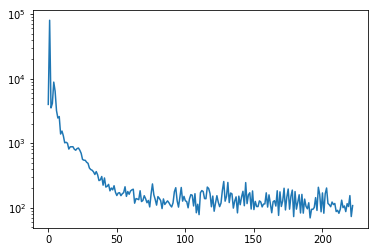

In [5]:
import matplotlib.pyplot as plt

plt.semilogy(losses)
plt.show()